In [288]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import datetime
from datetime import datetime
import re
import sklearn
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn.impute import SimpleImputer

## Clean the data

In [459]:
# 400,000
train = pd.read_csv('Data for Cleaning & Modeling.csv')
train.isna().sum()
# 80,000
test = pd.read_csv('Holdout for Testing.csv')

#### X1: choose to drop the missing rows (15.25%) instead of replacing with mean + change to numeric  

In [460]:
train = train.dropna(subset=['X1'])
# drop one row missing any value 
train.dropna(subset=['X4'], inplace=True)
# to numeric 
train['X1'] = pd.to_numeric(train['X1'].str.replace('%', '')) / 100

test.drop(['X1'], axis=1, inplace=True)

#### X2, X3: drop: unique identifiers, not useful

In [461]:
train.drop(['X2', 'X3'], axis=1, inplace=True)

test.drop(['X2', 'X3'], axis=1, inplace=True)

#### X4: keep + numeric , X5: numeric + should be changed to ['X4'] - ['X5'] to indicate the amount difference 

In [520]:
train[['X4','X5']] = train[['X4','X5']].replace('[\$,]','', regex=True).astype(float)
train['X5'] = train['X4'] - train['X5']

test[['X4','X5']] = test[['X4','X5']].replace('[\$,]','', regex=True).astype(float)
test['X5'] = test['X4'] - train['X5']
test['X5'].fillna((test['X5'].mean()), inplace=True)

#### X6: to numeric 

In [463]:
train[['X6']] = train[['X6']].replace('[\$,]','', regex=True).astype(float)

test[['X6']] = test[['X6']].replace('[\$,]','', regex=True).astype(float)

#### X7: to dummy instead of keeping it numerical 

In [464]:
NumPayments_Dummies_train = pd.get_dummies(train['X7'],drop_first = True)
train = train.join(NumPayments_Dummies_train)
train = train.drop(['X7'], axis=1)

NumPayments_Dummies_test = pd.get_dummies(test['X7'],drop_first = True)
test = test.join(NumPayments_Dummies_test)
test = test.drop(['X7'], axis=1)

#### X8: drop: more meaningful data in X9, may cause overfitting 

In [465]:
train.drop(['X8'], axis=1, inplace=True)

test.drop(['X8'], axis=1, inplace=True)

#### X9: to number: for rank purpose. eg: A2 = 2, B1 = 6 + fillna with median

In [466]:
train['X9'] = train['X9'].rank(method = 'dense')
train['X9'].fillna((train['X9'].median()), inplace=True)

test['X9'] = test['X9'].rank(method = 'dense')
test['X9'].fillna((test['X9'].median()), inplace=True)

#### X11: fill na with mean + to numeric 
* for Customers with work experience less than 1 year who have also missing values for X10 were converted to 0.
* for Customers with work experience less than 1 year who have values for X10 were converted to 1.
* for Customers with work experience more than 10 years were converted to 15 years of experiance as an average.

In [467]:
train.loc[(train['X10'].isnull())&(train['X11'].str.contains('< 1').astype('bool')),'X11'] = '0'
train.loc[(train['X10'].notnull())&(train['X11'].str.contains('< 1').astype('bool')),'X11'] = '1'
train['X11'] = train['X11'].replace('[,years]'or '[,year]','', regex=True ).replace( '10\+','15', regex=True)
pd.to_numeric(train['X11'])
train['X11'] = train['X11'].astype(int) 
train['X11'].fillna((train['X11'].mean()), inplace=True)

test.loc[(test['X10'].isnull())&(test['X11'].str.contains('< 1').astype('bool')),'X11'] = '0'
test.loc[(test['X10'].notnull())&(test['X11'].str.contains('< 1').astype('bool')),'X11'] = '1'
test['X11'] = test['X11'].replace('[,years]'or '[,year]','', regex=True ).replace( '10\+','15', regex=True)
test['X11'] = test['X11'].astype(int) 
test['X11'].fillna((test['X11'].mean()), inplace=True)

#### X10: drop: too many (187822) unique values

In [468]:
train.drop(['X10'], axis=1, inplace=True)

test.drop(['X10'], axis=1, inplace=True)

#### X12: fill na with mode + to dummy 

In [469]:
train['X12'].fillna((train['X12'].mode()), inplace=True)
OwnershipStatus_Dummies_train = pd.get_dummies(train['X12'],drop_first = True)
train = train.join(OwnershipStatus_Dummies_train)
train = train.drop(['X12'], axis=1)

OwnershipStatus_Dummies_test = pd.get_dummies(test['X12'],drop_first = True)
test = test.join(OwnershipStatus_Dummies_test)
test = test.drop(['X12'], axis=1)

#### X13: fill na with mean + to numeric 

In [470]:
train['X13'].fillna((train['X13'].mean()), inplace=True)
train['X13'] = train['X13'].astype(int)

test['X13'].fillna((test['X13'].mean()), inplace=True)
test['X13'] = test['X13'].astype(int)

#### X14: to dummy 

In [471]:
IncomeStatus_Dummies_train = pd.get_dummies(train['X14'],drop_first = True)
train = train.join(IncomeStatus_Dummies_train)
train = train.drop(['X14'], axis=1)

IncomeStatus_Dummies_test = pd.get_dummies(test['X14'],drop_first = True)
test = test.join(IncomeStatus_Dummies_test)
test = test.drop(['X14'], axis=1)

#### X15: categorized to 4 quarters + to dummy

In [472]:
train['X15'] = pd.to_datetime(train['X15'], format='%b-%d')
train['X15'] = train['X15'].dt.quarter
train['X15'].replace(1, 'first quarter', inplace=True)
train['X15'].replace(2, 'second quarter', inplace=True)
train['X15'].replace(3, 'third quarter', inplace=True)
train['X15'].replace(4, 'forth quarter', inplace=True)
IssueDate_Dummies_train = pd.get_dummies(train['X15'],drop_first = True)
train = train.join(IssueDate_Dummies_train)
train = train.drop(['X15'], axis=1)

test['X15'] =  pd.to_datetime(test['X15'], format='%d-%b')
test['X15'] = test['X15'].dt.quarter
test['X15'].replace(1, 'first quarter', inplace=True)
test['X15'].replace(2, 'second quarter', inplace=True)
test['X15'].replace(3, 'third quarter', inplace=True)
test['X15'].replace(4, 'forth quarter', inplace=True)
IssueDate_Dummies_test = pd.get_dummies(test['X15'],drop_first = True)
test = test.join(IssueDate_Dummies_test)
test = test.drop(['X15'], axis=1)

#### X16: drop: not useful

In [473]:
train.drop(['X16'], axis=1, inplace=True)

test.drop(['X16'], axis=1, inplace=True)

#### X17: to dummy 

In [474]:
LoanCategory_Dummies_train = pd.get_dummies(train['X17'],drop_first = True)
train = train.join(LoanCategory_Dummies_train)
train = train.drop(['X17'], axis=1)

LoanCategory_Dummies_test = pd.get_dummies(test['X17'],drop_first = True)
test = test.join(LoanCategory_Dummies_test)
test = test.drop(['X17'], axis=1)

#### X18: drop: too many (61630) unique variables, hard to creat dummy

In [475]:
train.drop(['X18'], axis=1, inplace=True)

test.drop(['X18'], axis=1, inplace=True)

#### X19: drop: duplicated data from X20, may cause overfitting 

In [476]:
train.drop(['X19'], axis=1, inplace=True)

test.drop(['X19'], axis=1, inplace=True)

#### X20: to dummy 

In [477]:
State_Dummies_train = pd.get_dummies(train['X20'],drop_first = True)
train = train.join(State_Dummies_train)
train = train.drop(['X20'], axis=1)

State_Dummies_test = pd.get_dummies(test['X20'],drop_first = True)
test = test.join(State_Dummies_test)
test = test.drop(['X20'], axis=1)

#### X21: to ratio

In [478]:
train['X21'] = train['X21'] / 100 

test['X21'] = test['X21'] / 100 

#### X22: to numeric

In [479]:
train['X22'] = train['X22'].astype(int) 

test['X22'] = test['X22'].astype(int) 

#### X23: substract from the most recent credit line which were opened among all the borrowers to denote the relative duration of borrowers having credit lines

In [480]:
def DT(s,flist):
    for f in flist:
        try:
            return datetime.strptime(s,f)
        except ValueError:
            pass

In [481]:
train['X23'] =  train['X23'].apply(lambda x: datetime.strptime(str(x),'%b-%y'))
train['X23'] = train['X23'].map(lambda dt: dt.replace(year=2001) if dt.year==1900 else dt.replace(year=dt.year))
train['X23'] = train['X23'].map(lambda dt: dt.replace(year=dt.year-100) if dt.year>2020 else dt.replace(year=dt.year))
Most_Recent_Date = train['X23'].max()
Days_CreditLine = Most_Recent_Date - train['X23']
train['X23'] = Days_CreditLine.dt.days.astype(float)

In [482]:
Flist = ['%b-%y','%d-%b']
test['X23'] =  test['X23'].apply(lambda x: DT(str(x),Flist))
test['X23'] = test['X23'].map(lambda dt: dt.replace(year=2001) if dt.year==1900 else dt.replace(year=dt.year))
test['X23'] = test['X23'].map(lambda dt: dt.replace(year=dt.year-100) if dt.year>2020 else dt.replace(year=dt.year))
Days_CreditLine = test['X23'].max() - test['X23']
test['X23'] = Days_CreditLine.dt.days.astype(float)

#### X24: to numeric

In [483]:
train['X24'] = train['X24'].astype(int) 

test['X24'] = test['X24'].astype(int) 

#### X25: replace with mean instead of dropping (54.7% missing in train)

In [484]:
train['X25'].fillna((train['X25'].mean()), inplace=True)

test['X25'].fillna((test['X25'].mean()), inplace=True)

#### X26: drop: too many missing (87.21% missing in train)

In [485]:
train.drop(['X26'], axis=1, inplace=True)

test.drop(['X26'], axis=1, inplace=True)

#### X27, X28, X29: to numeric

In [486]:
train['X27'] = train['X27'].astype(int) 
train['X28'] = train['X28'].astype(int) 
train['X29'] = train['X29'].astype(int) 

test['X27'] = test['X27'].astype(int) 
test['X28'] = test['X28'].astype(int) 
test['X29'] = test['X29'].astype(int) 

#### X30: to numeric + fill missing value with mean 

In [487]:
train['X30'] = pd.to_numeric(train['X30'].str.replace('%', '')) / 100
train['X30'].fillna((train['X30'].mean()), inplace=True)

test['X30'] = pd.to_numeric(test['X30'].str.replace('%', '')) / 100
test['X30'].fillna((test['X30'].mean()), inplace=True)

#### X31: to numeric

In [488]:
train['X31'] = train['X31'].astype(int)

test['X31'] = test['X31'].astype(int)

#### X32: to dummy 

In [489]:
InitialListingStatus_Dummies_train = pd.get_dummies(train['X32'],drop_first = True)
train = train.join(InitialListingStatus_Dummies_train)
train = train.drop(['X32'], axis=1)

InitialListingStatus_Dummies_test = pd.get_dummies(test['X32'],drop_first = True)
test = test.join(InitialListingStatus_Dummies_test)
test = test.drop(['X32'], axis=1)

In [490]:
# rearrange the training data 
cols = list(train.columns)
cols = cols[1:]+[cols[0]]
train = train[cols]

## Build + Test the model

In [508]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
import sklearn.model_selection as cv
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC, LinearSVC
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

In [491]:
cols = list(train.columns.values) 
cols.pop(cols.index('X1')) 
X = train[cols] 
y = train["X1"]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train, X_test, y_train, y_test = cv.train_test_split(X, y, test_size=.33, random_state=42)

# keep test.shape == X_train.shape
test.insert(17, 'MORTGAGE ', 0)
test.insert(18, 'NONE', 0)
test.insert(19, 'OTHER', 0)
test.insert(24, 'forth quarter', 0)
test.insert(25, 'second quarter', 0)
test.insert(26, 'third quarter', 0)
test.insert(29, 'educational', 0)  
test.insert(51, 'IA', 0)  
test.insert(52, 'ID', 0)  
test.insert(60, 'ME', 0)  
test.insert(67, 'NE', 0) 

#### 1. Xgboost

In [492]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

param_dict = {
    'max_depth':6, 
    'min_child_weight': 1,
    'eta':.1,
    'subsample': 1,
    'colsample_bytree': 1,
    'objective':'reg:linear',
    'eval_metric':'rmse'
}

Xgb = xgb.train(param_dict, dtrain, num_boost_round=999, evals=[(dtest, "Test")], early_stopping_rounds=10)

[23:09:07] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-rmse:0.32698
[1]	Test-rmse:0.29438
[2]	Test-rmse:0.26505
[3]	Test-rmse:0.23866
[4]	Test-rmse:0.21492
[5]	Test-rmse:0.19356
[6]	Test-rmse:0.17436
[7]	Test-rmse:0.15709
[8]	Test-rmse:0.14156
[9]	Test-rmse:0.12761
[10]	Test-rmse:0.11507
[11]	Test-rmse:0.10381
[12]	Test-rmse:0.09370
[13]	Test-rmse:0.08463
[14]	Test-rmse:0.07649
[15]	Test-rmse:0.06920
[16]	Test-rmse:0.06267
[17]	Test-rmse:0.05683
[18]	Test-rmse:0.05162
[19]	Test-rmse:0.04697
[20]	Test-rmse:0.04283
[21]	Test-rmse:0.03916
[22]	Test-rmse:0.03590
[23]	Test-rmse:0.03303
[24]	Test-rmse:0.03050
[25]	Test-rmse:0.02828
[26]	Test-rmse:0.02634
[27]	Test-rmse:0.02465
[28]	Test-rmse:0.02319
[29]	Test-rmse:0.02192
[30]	Test-rmse:0.02085
[31]	Test-rmse:0.01991
[32]	Test-rmse:0.01912
[33]	Test-rmse:0.01846
[34]	Test-rmse:0.01789
[35]	Test-rmse:0.01741
[36]	Test-rmse:0.01701
[37]	Test-

[340]	Test-rmse:0.01367
[341]	Test-rmse:0.01367
[342]	Test-rmse:0.01367
[343]	Test-rmse:0.01367


In [493]:
dpred = xgb.DMatrix(X_test)
y_pred_Xgb = Xgb.predict(dpred)
mse_Xgb = MSE(y_test, y_pred_Xgb)
rmse_Xgb = mse_Xgb**(1/2)
print("Test set RMSE of Xgb: {:.9f}".format(rmse_Xgb))

Test set RMSE of Xgb: 0.013671277


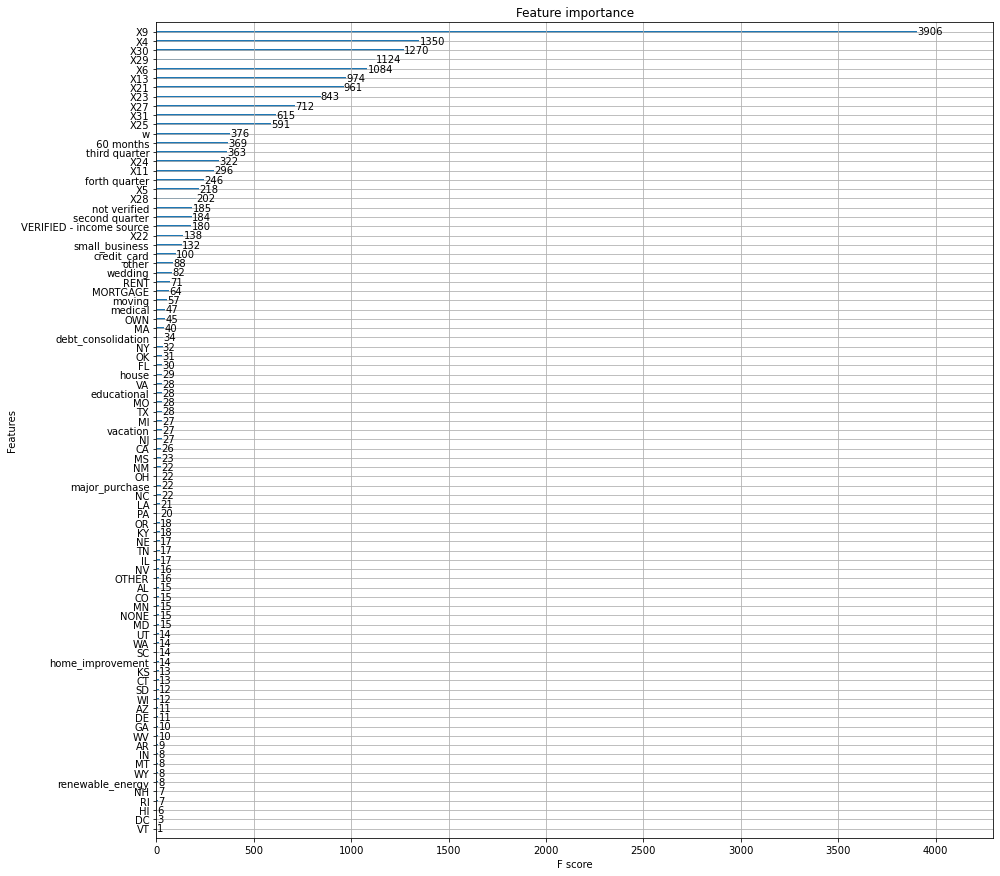

In [494]:
# plot F-score of each feature using xgboost's .plot_importance() method
pic = plot_importance(Xgb)
fig = pic.get_figure()
fig.set_figheight(15)
fig.set_figwidth(15)

#### Using the inbuilt XGBClassifier: the score is higher than the method described above.

In [381]:
XGB = XGBClassifier()
XGB.fit(X_train, y_train)
y_pred_XGB = XGB.predict(X_test)
mse_XGB = MSE(y_test, y_pred_XGB)
rmse_XGB = mse_XGB**(1/2)
print("Test set RMSE of XGB: {:.5f}".format(rmse_XGB))

[19:24:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Test set RMSE of XGB: 0.03550


In [ ]:
# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(XGB, X_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 
# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)
# Print RMSE_CV
print('CV RMSE Xgb: {:.5f}'.format(RMSE_CV))

#### 2. linear regression 

In [553]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
#lr_test_pred = lr.predict(test)
mse_lr = MSE(y_test, y_pred_lr)
rmse_lr = mse_lr**(1/2)
print("Test set RMSE of linear regression: {:.9f}".format(rmse_lr))

Test set RMSE of linear regression: 0.017910140


In [496]:
# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(lr, X_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 
# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)
# Print RMSE_CV
print('CV RMSE linear regression: {:.9f}'.format(RMSE_CV))

CV RMSE linear regression: 0.018086914


#### 3. Random Forest

In [502]:
rf = RandomForestRegressor(n_estimators=400,min_samples_leaf=0.12,random_state=1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = MSE(y_test, y_pred_rf)
rmse_rf = mse_rf**(1/2)
print("Test set RMSE of random forest: {:.9f}".format(rmse_rf))

Test set RMSE of random forest: 0.025328875


In [506]:
# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(rf, X_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 
# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)
# Print RMSE_CV
print('CV RMSE Random Forest: {:.9f}'.format(RMSE_CV))

CV RMSE Random Forest: 0.025438047


#### 4. Gradient Boost

In [509]:
gb = GradientBoostingRegressor(max_depth=4, n_estimators=200, random_state=2)
gb.fit(X_train, y_train)
y_pred_Gboost = gb.predict(X_test)
mse_Gboost = MSE(y_test, y_pred_Gboost)
rmse_Gboost = mse_Gboost**(1/2)
print('Test set RMSE of gb: {:.9f}'.format(rmse_Gboost))

Test set RMSE of gb: 0.014459556


In [510]:
# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(gb, X_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 
# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)
# Print RMSE_CV
print('CV RMSE Random Forest: {:.9f}'.format(RMSE_CV))

CV RMSE Random Forest: 0.014567427


## Fit to get the final answer

In [557]:
# Gradient boost 
gb = GradientBoostingRegressor(max_depth=4, n_estimators=200, random_state=2)
gb.fit(X, y)
Gboost_test_pred = gb.predict(test)
print(Gboost_test_pred[:10])

[0.15645039 0.05944677 0.14128515 0.15834889 0.09426771 0.11332466
 0.13742299 0.10316339 0.14712747 0.06551215]


In [563]:
# save the one with gradient boost as final results
results = pd.DataFrame(Gboost_test_pred,columns = ['results'])
results.to_csv('Results from Jianghong Man.csv', index=False)

In [564]:
results.head()

,results
0,0.156450
1,0.059447
2,0.141285
3,0.158349
4,0.094268
